In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df= pd.read_csv("../Data/BrentOilPrices.csv")

In [24]:
df=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_25300\2276709877.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("../Data/BrentOilPrices.csv", parse_dates=["Date"])


In [21]:
df.head()
df.info

<bound method DataFrame.info of               Date  Price
0        20-May-87  18.63
1        21-May-87  18.45
2        22-May-87  18.55
3        25-May-87  18.60
4        26-May-87  18.63
...            ...    ...
9006  Nov 08, 2022  96.85
9007  Nov 09, 2022  93.05
9008  Nov 10, 2022  94.25
9009  Nov 11, 2022  96.37
9010  Nov 14, 2022  93.59

[9011 rows x 2 columns]>

In [ ]:
df.isnull().sum()

Price    0
dtype: int64

Graph_for oil_price

# Basic exploration of the data

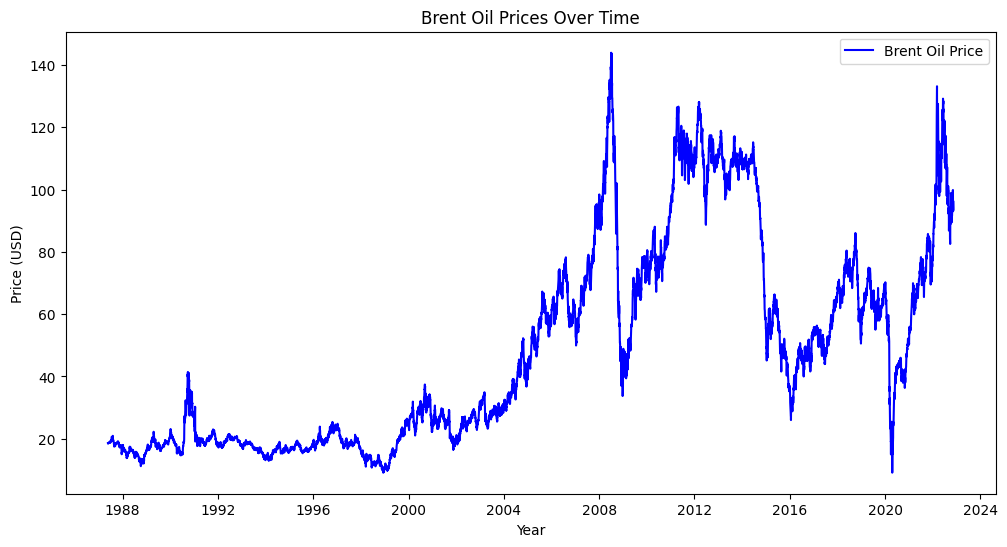

In [ ]:
def plot_prices(df):
    """Plots oil prices over time."""
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['Price'], label="Brent Oil Price", color="blue")
    plt.xlabel("Year")
    plt.ylabel("Price (USD)")
    plt.title("Brent Oil Prices Over Time")
    plt.legend()
    plt.show()


plot_prices(df)



# Price shift in percent

In [ ]:

def detect_price_shocks(df, threshold=5):
    """Detects significant price changes based on percentage change threshold."""
    df["Price_Change"] = df["Price"].pct_change() * 100
    return df[abs(df["Price_Change"]) > threshold]

detect_price_shocks(df)


,Price,Price_Change
Date,,
1987-12-14,16.80,-5.245347
1987-12-17,15.03,-5.649718
1987-12-22,16.70,8.441558
1988-01-08,16.88,-5.698324
1988-07-07,15.50,6.896552
...,...,...
2022-07-12,106.98,-6.852416
2022-07-22,106.77,-5.354135
2022-08-15,98.25,-5.255545


# Change Point analysis

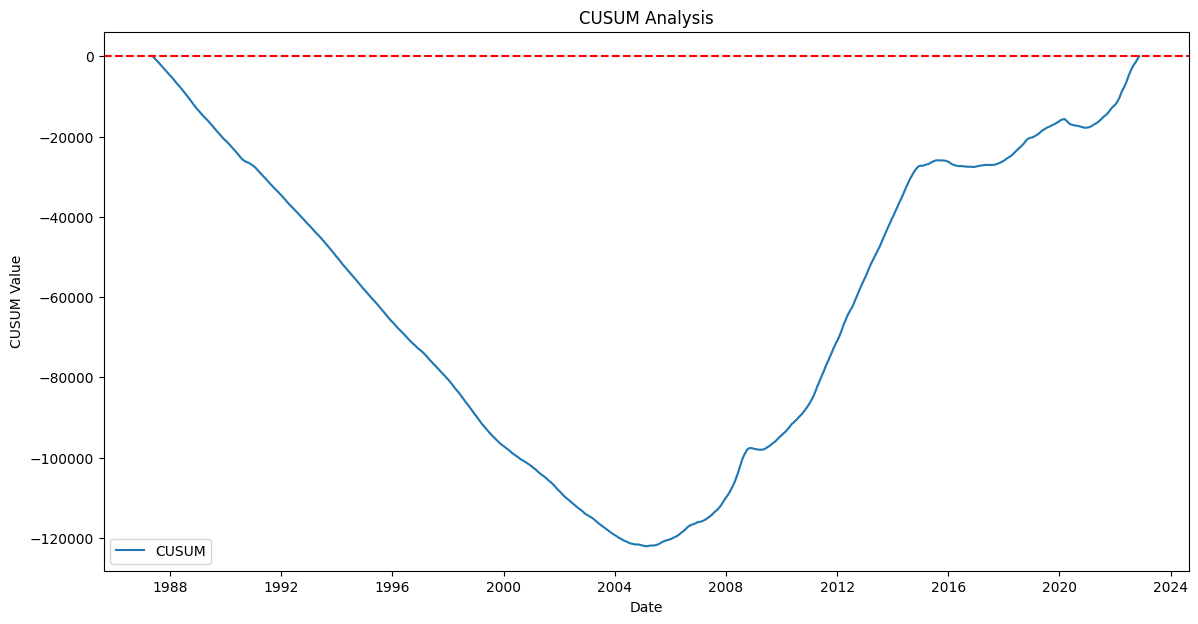

In [28]:
from scripts.cusum_analysis import *
from scripts.cusum_analysis import calculate_cusum, plot_cusum


# Calculate the CUSUM
cusum = calculate_cusum(df)

# Plot the results
plot_cusum(df, cusum)
